In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Spark Operations').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/02 12:10:12 WARN Utils: Your hostname, deepak-ubuntu, resolves to a loopback address: 127.0.1.1; using 192.168.31.105 instead (on interface wlp1s0)
25/10/02 12:10:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/02 12:10:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/02 12:10:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/10/02 12:10:18 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/10/02 12:10:18 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [12]:
df = spark.read.format('json').load('/home/deepak/programs/python/sparkLearn/data/flight-data/json')

In [10]:
df.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [11]:
df.printSchema() ## Schema on read

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [14]:
df.schema 
# A schema is a StructType made up of number of StructFields, that has name , type and a boolean flag (null or not null), finally,
# users can optionally specify associated metadata with that column. The
# metadata is a way of storing information about this column (Spark uses
# this in its machine learning library).

StructType([StructField('DEST_COUNTRY_NAME', StringType(), True), StructField('ORIGIN_COUNTRY_NAME', StringType(), True), StructField('count', LongType(), True)])

- When using Spark for production Extract, Transform,
and Load (ETL), it is often a good idea to define your schemas manually, especially
when working with untyped data sources like CSV and JSON because schema
inference can vary depending on the type of data that you read in.

In [27]:
# My Manual Schema
from pyspark.sql.types import StructType, StructField, StringType, LongType

flight_json_schema = StructType([
    StructField('DEST_COUNTRY_NAME', StringType(), True),
    StructField('ORIGIN_COUNTRY_NAME', StringType(), True),
    StructField('count', LongType(), True, metadata={'hello': 'world'})
])

In [28]:
df_with_schema = spark.read.format('json').schema(flight_json_schema).load('/home/deepak/programs/python/sparkLearn/data/flight-data/json')

In [29]:
df_with_schema.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [22]:
df_with_schema.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- COUNT: long (nullable = true)



In [33]:
##Columns
from pyspark.sql.functions import col, column

In [ ]:
col('SomeColName'), column('SomeColumnName') #both are same

# Note
# Columns are not
# resolved until we compare the column names with those we are
# maintaining in the catalog. Column and table resolution happens in the
# analyzer phase,

(Column<'SomeColName'>, Column<'SomeColumnName'>)

## Expressions

### Expressions in Spark

- **Definition**:  
  An expression is a set of **transformations on one or more values** in a DataFrame row.  
  - Think of it as a function that takes columns, resolves them, and applies operations to produce a **single value per record** (can be complex types like Map or Array).

- **Equivalences**:
  ```python
  expr("someCol")          # same as col("someCol")
  expr("someCol - 5")      # same as col("someCol") - 5 or expr("someCol") - 5

Key Points:

- Columns are just expressions.

- Column transformations compile to the same logical plan as parsed expressions.

Example: 

(((col("someCol") + 5) * 200) - 6) < col("otherCol")

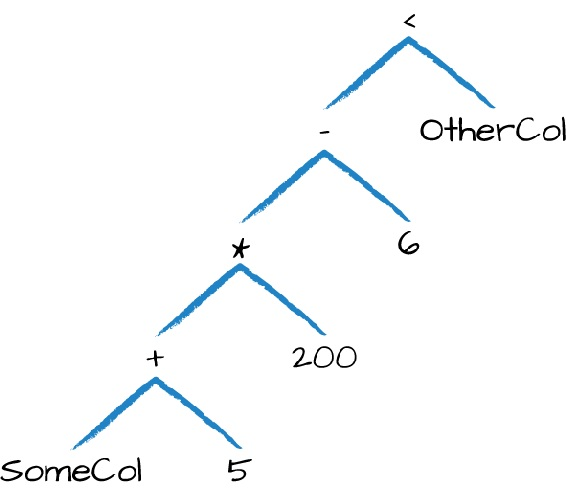

In [37]:
df_with_schema.columns

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count']

In [42]:
## Records and Rows

# each row in a DataFrame is a single record. Spark represents this
# record as an object of type Row

df_with_schema.first()

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)

In [45]:
from pyspark.sql import Row

my_row = Row("hello", 1, 2) #internally its represents array of bytes

In [47]:
my_row, my_row[0], my_row[1]

(<Row('hello', 1, 2)>, 'hello', 1)

## Dataframe Transformations

- We can remove rows or columns
- We can add rows or columns
- We can transform a row into a column (or vice versa)
- We can change the order of rows based on the values in columns

In [49]:
## Creating our own Dataframes using Row Object

from pyspark.sql.types import StructField, StructType, StringType, LongType
myManualSchema = StructType([
    StructField("some", StringType(), True),
    StructField("col", StringType(), True),
    StructField("names", LongType(), False)
])
myRow = Row("Hello", None, 1)
myDf = spark.createDataFrame([myRow], myManualSchema)
myDf.show()

+-----+----+-----+
| some| col|names|
+-----+----+-----+
|Hello|NULL|    1|
+-----+----+-----+



In [51]:
#Select and SelectExpr

df_with_schema.select('DEST_COUNTRY_NAME').show()

+--------------------+
|   DEST_COUNTRY_NAME|
+--------------------+
|       United States|
|       United States|
|       United States|
|               Egypt|
|       United States|
|       United States|
|       United States|
|          Costa Rica|
|             Senegal|
|             Moldova|
|       United States|
|       United States|
|              Guyana|
|               Malta|
|            Anguilla|
|             Bolivia|
|       United States|
|             Algeria|
|Turks and Caicos ...|
|       United States|
+--------------------+
only showing top 20 rows


In [ ]:
from pyspark.sql.functions import expr
df_with_schema.select(
    col('DEST_COUNTRY_NAME'),
    column('DEST_COUNTRY_NAME'),
    expr('DEST_COUNTRY_NAME as DEST')
).show()

# You can select multiple columns by using the same style of query, just add
# more column name strings to your select method call:

# Note, you cannot mix column objects ex Col('some') and 'Some' this will give compiler error

# expr is the most flexible reference that we can
# use. It can refer to a plain column or a string manipulation of a column

+--------------------+--------------------+--------------------+
|   DEST_COUNTRY_NAME|   DEST_COUNTRY_NAME|                DEST|
+--------------------+--------------------+--------------------+
|       United States|       United States|       United States|
|       United States|       United States|       United States|
|       United States|       United States|       United States|
|               Egypt|               Egypt|               Egypt|
|       United States|       United States|       United States|
|       United States|       United States|       United States|
|       United States|       United States|       United States|
|          Costa Rica|          Costa Rica|          Costa Rica|
|             Senegal|             Senegal|             Senegal|
|             Moldova|             Moldova|             Moldova|
|       United States|       United States|       United States|
|       United States|       United States|       United States|
|              Guyana|   

In [58]:
df_with_schema.selectExpr(
    "DEST_COUNTRY_NAME as DEST",
    "6+7"
).show()

+--------------------+-------+
|                DEST|(6 + 7)|
+--------------------+-------+
|       United States|     13|
|       United States|     13|
|       United States|     13|
|               Egypt|     13|
|       United States|     13|
|       United States|     13|
|       United States|     13|
|          Costa Rica|     13|
|             Senegal|     13|
|             Moldova|     13|
|       United States|     13|
|       United States|     13|
|              Guyana|     13|
|               Malta|     13|
|            Anguilla|     13|
|             Bolivia|     13|
|       United States|     13|
|             Algeria|     13|
|Turks and Caicos ...|     13|
|       United States|     13|
+--------------------+-------+
only showing top 20 rows


In [ ]:
# We can treat selectExpr as a
# simple way to build up complex expressions that create new DataFrames.
# In fact, we can add any valid non-aggregating SQL statement, and as long
# as the columns resolve, it will be valid

In [59]:
df_with_schema.selectExpr(
    "*",
    "(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) as withinCountry"
).show()

+--------------------+-------------------+-----+-------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+--------------------+-------------------+-----+-------------+
|       United States|            Romania|   15|        false|
|       United States|            Croatia|    1|        false|
|       United States|            Ireland|  344|        false|
|               Egypt|      United States|   15|        false|
|       United States|              India|   62|        false|
|       United States|          Singapore|    1|        false|
|       United States|            Grenada|   62|        false|
|          Costa Rica|      United States|  588|        false|
|             Senegal|      United States|   40|        false|
|             Moldova|      United States|    1|        false|
|       United States|       Sint Maarten|  325|        false|
|       United States|   Marshall Islands|   39|        false|
|              Guyana|      United States|   64|       

In [60]:
# Lets register this table as view so that we can query using SQL

df_with_schema.createOrReplaceTempView('dfTable')

In [62]:
spark.sql("""
    select *, (dest_country_name = origin_country_name) from dfTable
""").show()

+--------------------+-------------------+-----+-----------------------------------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|(dest_country_name = origin_country_name)|
+--------------------+-------------------+-----+-----------------------------------------+
|       United States|            Romania|   15|                                    false|
|       United States|            Croatia|    1|                                    false|
|       United States|            Ireland|  344|                                    false|
|               Egypt|      United States|   15|                                    false|
|       United States|              India|   62|                                    false|
|       United States|          Singapore|    1|                                    false|
|       United States|            Grenada|   62|                                    false|
|          Costa Rica|      United States|  588|                                    false|

In [64]:
df_with_schema.selectExpr(
    "round(avg(count), 2)",
    "count(distinct dest_country_name)"
).show()

+--------------------+---------------------------------+
|round(avg(count), 2)|count(DISTINCT dest_country_name)|
+--------------------+---------------------------------+
|             1718.32|                              167|
+--------------------+---------------------------------+



In [65]:
# Literals

# Sometimes, we need to pass explicit values into Spark that are just a value
# (rather than a new column). This might be a constant value or something
# we’ll need to compare to later on. The way we do this is through literals.

In [66]:
from pyspark.sql.functions import lit

In [73]:
# df.selectExpr(
#     '*',
#     '1 as ONE'
# ).show()

df.select(
    expr('*'),
    lit(1).alias('ONE')
).show()

+--------------------+-------------------+-----+---+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|ONE|
+--------------------+-------------------+-----+---+
|       United States|            Romania|   15|  1|
|       United States|            Croatia|    1|  1|
|       United States|            Ireland|  344|  1|
|               Egypt|      United States|   15|  1|
|       United States|              India|   62|  1|
|       United States|          Singapore|    1|  1|
|       United States|            Grenada|   62|  1|
|          Costa Rica|      United States|  588|  1|
|             Senegal|      United States|   40|  1|
|             Moldova|      United States|    1|  1|
|       United States|       Sint Maarten|  325|  1|
|       United States|   Marshall Islands|   39|  1|
|              Guyana|      United States|   64|  1|
|               Malta|      United States|    1|  1|
|            Anguilla|      United States|   41|  1|
|             Bolivia|      United States|   3

In [74]:
## Add new column more formal way

df_with_schema.withColumn('numberOne', lit(1)).show()

+--------------------+-------------------+-----+---------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|numberOne|
+--------------------+-------------------+-----+---------+
|       United States|            Romania|   15|        1|
|       United States|            Croatia|    1|        1|
|       United States|            Ireland|  344|        1|
|               Egypt|      United States|   15|        1|
|       United States|              India|   62|        1|
|       United States|          Singapore|    1|        1|
|       United States|            Grenada|   62|        1|
|          Costa Rica|      United States|  588|        1|
|             Senegal|      United States|   40|        1|
|             Moldova|      United States|    1|        1|
|       United States|       Sint Maarten|  325|        1|
|       United States|   Marshall Islands|   39|        1|
|              Guyana|      United States|   64|        1|
|               Malta|      United States|    1|        

In [77]:
df_with_schema.withColumn('withinCountry', expr('DEST_COUNTRY_NAME == ORIGIN_COUNTRY_NAME')).show()

+--------------------+-------------------+-----+-------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+--------------------+-------------------+-----+-------------+
|       United States|            Romania|   15|        false|
|       United States|            Croatia|    1|        false|
|       United States|            Ireland|  344|        false|
|               Egypt|      United States|   15|        false|
|       United States|              India|   62|        false|
|       United States|          Singapore|    1|        false|
|       United States|            Grenada|   62|        false|
|          Costa Rica|      United States|  588|        false|
|             Senegal|      United States|   40|        false|
|             Moldova|      United States|    1|        false|
|       United States|       Sint Maarten|  325|        false|
|       United States|   Marshall Islands|   39|        false|
|              Guyana|      United States|   64|       

In [78]:
## Renaming Column

df_with_schema.withColumnRenamed('DEST_COUNTRY_NAME', 'DEST').show()

+--------------------+-------------------+-----+
|                DEST|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [79]:
## Handling spaces columns in Spark using backtik

In [81]:
df_with_schema = df_with_schema.withColumn('This New COlumn', expr('DEST_COUNTRY_NAME'))

In [82]:
df_with_schema.show()

+--------------------+-------------------+-----+--------------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|     This New COlumn|
+--------------------+-------------------+-----+--------------------+
|       United States|            Romania|   15|       United States|
|       United States|            Croatia|    1|       United States|
|       United States|            Ireland|  344|       United States|
|               Egypt|      United States|   15|               Egypt|
|       United States|              India|   62|       United States|
|       United States|          Singapore|    1|       United States|
|       United States|            Grenada|   62|       United States|
|          Costa Rica|      United States|  588|          Costa Rica|
|             Senegal|      United States|   40|             Senegal|
|             Moldova|      United States|    1|             Moldova|
|       United States|       Sint Maarten|  325|       United States|
|       United State

In [87]:
df_with_schema.selectExpr(
    "`This New COlumn`", # we need to use backticks because we’re referencing a column in an expression
    #"This New Column" this is not treated as col 
).show()

+--------------------+
|     This New COlumn|
+--------------------+
|       United States|
|       United States|
|       United States|
|               Egypt|
|       United States|
|       United States|
|       United States|
|          Costa Rica|
|             Senegal|
|             Moldova|
|       United States|
|       United States|
|              Guyana|
|               Malta|
|            Anguilla|
|             Bolivia|
|       United States|
|             Algeria|
|Turks and Caicos ...|
|       United States|
+--------------------+
only showing top 20 rows


In [88]:
# dropping and casting types to columns

In [90]:
df_with_schema.drop("This New Column").columns

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count']

In [ ]:
df_with_schema.withColumn('Count2', col('count').cast(StringType())) 

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint, This New COlumn: string, Count2: string]

In [93]:
df_with_schema.where("count < 2 and DEST_COUNTRY_NAME != 'United States'").show()

+--------------------+-------------------+-----+--------------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|     This New COlumn|
+--------------------+-------------------+-----+--------------------+
|             Moldova|      United States|    1|             Moldova|
|               Malta|      United States|    1|               Malta|
|Saint Vincent and...|      United States|    1|Saint Vincent and...|
|            Suriname|      United States|    1|            Suriname|
|        Burkina Faso|      United States|    1|        Burkina Faso|
|            Djibouti|      United States|    1|            Djibouti|
|              Zambia|      United States|    1|              Zambia|
|              Cyprus|      United States|    1|              Cyprus|
|       Cote d'Ivoire|      United States|    1|       Cote d'Ivoire|
|              Kosovo|      United States|    1|              Kosovo|
|                Iraq|      United States|    1|                Iraq|
|           Indonesi

In [94]:
df_with_schema.where("count < 2").where("DEST_COUNTRY_NAME != 'United States'").show()

+--------------------+-------------------+-----+--------------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|     This New COlumn|
+--------------------+-------------------+-----+--------------------+
|             Moldova|      United States|    1|             Moldova|
|               Malta|      United States|    1|               Malta|
|Saint Vincent and...|      United States|    1|Saint Vincent and...|
|            Suriname|      United States|    1|            Suriname|
|        Burkina Faso|      United States|    1|        Burkina Faso|
|            Djibouti|      United States|    1|            Djibouti|
|              Zambia|      United States|    1|              Zambia|
|              Cyprus|      United States|    1|              Cyprus|
|       Cote d'Ivoire|      United States|    1|       Cote d'Ivoire|
|              Kosovo|      United States|    1|              Kosovo|
|                Iraq|      United States|    1|                Iraq|
|           Indonesi

In [96]:
# distinct records

df_with_schema.select('DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME').distinct().count()

320

In [98]:
df.schema, df_with_schema.schema

(StructType([StructField('DEST_COUNTRY_NAME', StringType(), True), StructField('ORIGIN_COUNTRY_NAME', StringType(), True), StructField('count', LongType(), True)]),
 StructType([StructField('DEST_COUNTRY_NAME', StringType(), True), StructField('ORIGIN_COUNTRY_NAME', StringType(), True), StructField('count', LongType(), True), StructField('This New COlumn', StringType(), True)]))

In [99]:
df_with_schema = df_with_schema.drop('This New COlumn')

In [ ]:
## Unions
# To union two DataFrames, you must be sure that they have
# the same schema and number of columns; otherwise, the union will fail
df_with_schema.union(df)

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

In [105]:
# SOrt
from pyspark.sql.functions import desc, asc, desc_nulls_last
df_with_schema.orderBy(col('count').desc_nulls_last()).show() # or expr('count desc')

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|      United States|358354|
|    United States|      United States|352742|
|    United States|      United States|348113|
|    United States|      United States|347452|
|    United States|      United States|343132|
|    United States|             Canada|  8650|
|           Canada|      United States|  8514|
|    United States|             Canada|  8483|
|           Canada|      United States|  8399|
|    United States|             Canada|  8305|
|           Canada|      United States|  8271|
|    United States|             Canada|  8177|
|    United States|             Canada|  8097|
|           Canada|      United States|  8034|
|    United States|             Canada|  7983|
|           Canada|      United States|  7974|
|           Canada|      United States|  7860|
|    United S

In [ ]:
# For optimization purposes, it’s sometimes advisable to sort within each
# partition before another set of transformations. You can use the
# sortWithinPartitions method to do this


# spark.read.format("json").load("/data/flight-data/json/*-
# summary.json")\
# .sortWithinPartitions("count")

In [109]:
df_with_schema.orderBy(col('count').desc_nulls_last()).limit(10).take(10)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='United States', count=370002),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='United States', count=358354),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='United States', count=352742),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='United States', count=348113),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='United States', count=347452),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='United States', count=343132),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Canada', count=8650),
 Row(DEST_COUNTRY_NAME='Canada', ORIGIN_COUNTRY_NAME='United States', count=8514),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Canada', count=8483),
 Row(DEST_COUNTRY_NAME='Canada', ORIGIN_COUNTRY_NAME='United States', count=8399)]

In [ ]:
# Repartition and Coalesce

# partition the data according to some frequently filtered columns, which control the physical
# layout of data across the cluster including the partitioning scheme and the
# number of partitions.

# Repartition will incur a full shuffle of the data, regardless of whether one
# is necessary. This means that you should typically only repartition when
# the future number of partitions is greater than your current number of
# partitions or when you are looking to partition by a set of columns:

In [110]:
df.rdd.getNumPartitions()

6

In [111]:
df_with_schema.rdd.getNumPartitions()

6

In [114]:
df_with_schema.repartition(3).rdd.getNumPartitions()

3

In [115]:
# If you know that you’re going to be filtering by a certain column often, it
# can be worth repartitioning based on that column:

df_with_schema.repartition(3, col('DEST_COUNTRY_NAME')).rdd.getNumPartitions()

3

In [ ]:
# Coalesce, on the other hand, will not incur a full shuffle and will try to
# combine partitions. This operation will shuffle your data into five
# partitions based on the destination country name, and then coalesce them
# (without a full shuffle):

In [116]:
df_with_schema.repartition(3, col('DEST_COUNTRY_NAME')).coalesce(2).rdd.getNumPartitions()

2

In [ ]:
# Collecting Rows to the Driver

# Warning

# Any collection of data to the driver can be a very expensive operation! If you have a
# large dataset and call collect, you can crash the driver. If you use
# toLocalIterator and have very large partitions, you can easily crash the driver
# node and lose the state of your application. This is also expensive because we can
# operate on a one-by-one basis, instead of running computation in parallel.

In [117]:
df_with_schema.collect()

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Grenada', count=62),
 Row(DEST_COUNTRY_NAME='Costa Rica', ORIGIN_COUNTRY_NAME='United States', count=588),
 Row(DEST_COUNTRY_NAME='Senegal', ORIGIN_COUNTRY_NAME='United States', count=40),
 Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Sint Maarten', count=325),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Marshall Islands', count=39),
 

In [118]:
df_with_schema.take(10)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Grenada', count=62),
 Row(DEST_COUNTRY_NAME='Costa Rica', ORIGIN_COUNTRY_NAME='United States', count=588),
 Row(DEST_COUNTRY_NAME='Senegal', ORIGIN_COUNTRY_NAME='United States', count=40),
 Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1)]

In [119]:
df_with_schema.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [ ]:
df_with_schema.toLocalIterator()
# toLocalIterator collects
# partitions to the driver as an iterator. This method allows you to iterate
# over the entire dataset partition-by-partition in a serial manner

<generator object _local_iterator_from_socket.<locals>.PyLocalIterable.__iter__ at 0x709da856c380>

In [122]:
for i in df_with_schema.toLocalIterator():
    print(i)
    print('=========')

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344)
Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Grenada', count=62)
Row(DEST_COUNTRY_NAME='Costa Rica', ORIGIN_COUNTRY_NAME='United States', count=588)
Row(DEST_COUNTRY_NAME='Senegal', ORIGIN_COUNTRY_NAME='United States', count=40)
Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Sint Maarten', count=325)
Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Marshall Islands', count=39)
Row(DEST_COUNTRY_NAME='Gu